In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns


In [10]:
digits = datasets.load_digits()
X = digits.data
y = digits.target


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
svm_clf = SVC(kernel='rbf', gamma='scale')

In [13]:
cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.98958333 0.98263889 0.97560976 0.99303136 0.98954704]
Mean CV Accuracy: 0.9861


In [14]:
svm_clf.fit(X_train, y_train)

SVC()

In [15]:

y_pred = svm_clf.predict(X_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")


Test Set Accuracy: 0.9861


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


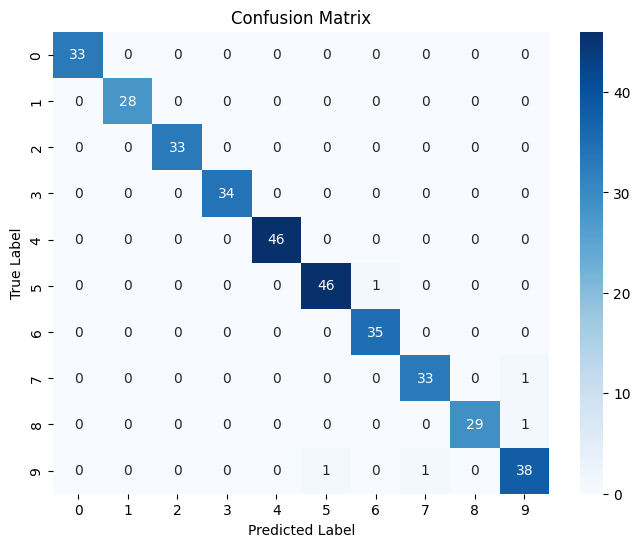

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

<ipython-input-20-c1af1ce77b22>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.get_cmap('tab10', 10), edgecolor='k', s=50)


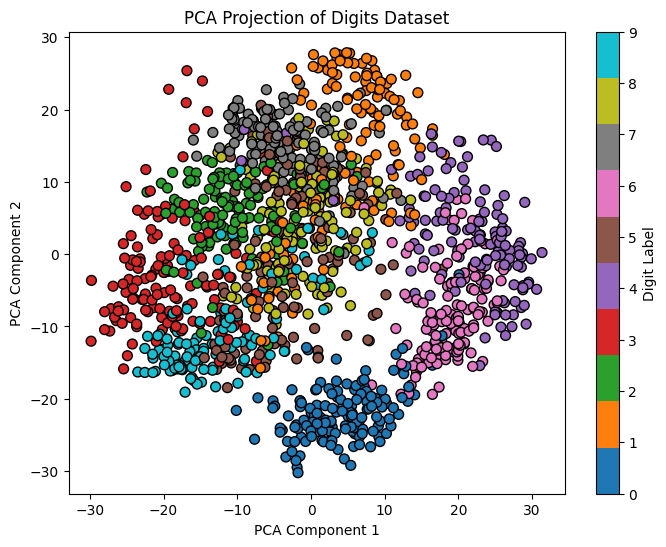

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.get_cmap('tab10', 10), edgecolor='k', s=50)
plt.colorbar(label='Digit Label')
plt.title("PCA Projection of Digits Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [21]:
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

In [22]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [23]:
svm_clf_pca = SVC(kernel='rbf', gamma='scale')
svm_clf_pca.fit(X_train_pca, y_train)

SVC()

In [24]:
Z = svm_clf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<ipython-input-25-4cfbf27e3fb6>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.get_cmap('tab10', 10))
<ipython-input-25-4cfbf27e3fb6>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.get_cmap('tab10', 10), edgecolor='k', s=50)


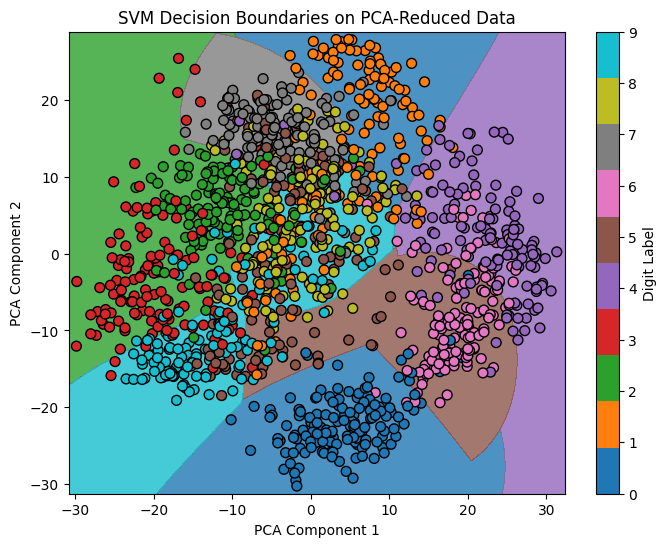

In [25]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.get_cmap('tab10', 10))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.get_cmap('tab10', 10), edgecolor='k', s=50)
plt.title("SVM Decision Boundaries on PCA-Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Digit Label')
plt.show()

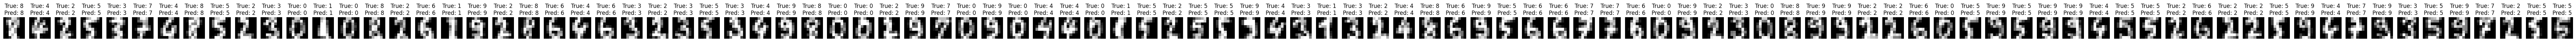

In [26]:
def plot_random_images(X_test, y_test, y_pred, num_images=100):
    indices = np.random.choice(len(X_test), num_images, replace=False)
    plt.figure(figsize=(100, 60))

    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_test[idx].reshape(8, 8), cmap="gray")
        plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.show()


plot_random_images(X_test, y_test, y_pred)